# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/).

Some of the questions get kind of weird in this one, especially later on. **Feel free to lean on ChatGPT for the crazier ones!** It might be an interesting exploration of how to ask problems or explain what your dataset looks like.

## Do your importing and your setup

In [6]:
import pandas as pd 
!pip install openpyxl # Install Excel reader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 7.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [7]:
excel_file_path = 'NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx'

In [8]:
df = pd.read_excel(excel_file_path)

In [9]:
df.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [10]:
len(df)

81937

In [11]:
df.dtypes

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

Each row in this dataset represents a single dog license record in New York City. Each row contains information about the dog's owner, the animal itself (such as name, gender, breed, and color), and details about the dog's licensing and vaccination status.

Two column examples:

"Animal Name": The given name of the dog (e.g., "BLUE MACK").
"Spayed or Neut": Indicates whether the dog has been spayed or neutered ("Yes" or "No").

# Your thoughts

Think of three questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

In [ ]:
- What breed mixes are most common 
- What are the most popular names?
- How many dogs are vaccinated?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [46]:
# Count the most common Primary Breeds
breed_counts = df['Primary Breed'].value_counts()
breed_counts.head(10)

Primary Breed
Yorkshire Terrier                       5133
Shih Tzu                                4727
Chihuahua                               3924
Maltese                                 2965
Labrador Retriever                      2872
American Pit Bull Terrier/Pit Bull      2153
American Pit Bull Mix / Pit Bull Mix    2029
Labrador Retriever Crossbreed           1864
Beagle                                  1438
Pomeranian                              1422
Name: count, dtype: int64

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

...maybe "unknown" should just count as missing data?

In [47]:
# Treat "Unknown" (or case variants) as missing
df['Primary Breed'] = df['Primary Breed'].replace("Unknown", pd.NA)

# Drop missing values in the breed column
breed_counts = df['Primary Breed'].dropna().value_counts()

breed_counts.head(10)

Primary Breed
Yorkshire Terrier                       5133
Shih Tzu                                4727
Chihuahua                               3924
Maltese                                 2965
Labrador Retriever                      2872
American Pit Bull Terrier/Pit Bull      2153
American Pit Bull Mix / Pit Bull Mix    2029
Labrador Retriever Crossbreed           1864
Beagle                                  1438
Pomeranian                              1422
Name: count, dtype: int64

## What are the most popular dog names?

In [48]:
name_counts = df['Animal Name'].value_counts()
name_counts.head(10)

Animal Name
UNKNOWN    742
Bella      527
Max        515
Charlie    403
Lola       387
Unknown    379
Rocky      354
Lucy       338
unknown    337
Coco       308
Name: count, dtype: int64

## What percentage of dogs are guard dogs?

In [49]:
# Count the number of guard dogs 
num_guard_dogs = (df['Guard or Trained'] == 'Yes').sum()

# Total number of dogs (excluding missing values if any)
total_dogs = df['Guard or Trained'].notna().sum()

# Calculate the percentage
percentage_guard_dogs = (num_guard_dogs / total_dogs) * 100

print(f"Percentage of guard dogs: {percentage_guard_dogs:.2f}%")

Percentage of guard dogs: 0.06%


## What are the actual numbers?

I re-run my cell, so now it's showing the updated number 

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll be a little more specific when using `.value_counts()`

In [21]:
print("Total rows:", len(df))
print("Non-missing in 'Guard or Trained':", df['Guard or Trained'].notna().sum())
print("Value counts:")
print(df['Guard or Trained'].value_counts(dropna=False))

Total rows: 81937
Non-missing in 'Guard or Trained': 49576
Value counts:
Guard or Trained
No     49525
NaN    32361
Yes       51
Name: count, dtype: int64


## Fill in all of those empty "Guard or Trained" columns with "No"

In this case, it seems nicer than missing data. Then check your result with another `.value_counts()`

In [51]:
# Fill missing values in 'Guard or Trained' with "No"
df['Guard or Trained'] = df['Guard or Trained'].fillna('No')

print(df['Guard or Trained'].value_counts())

Guard or Trained
No     81886
Yes       51
Name: count, dtype: int64


## What are the top dog breeds for guard dogs?

In [23]:
# Filter for guard dogs
guard_dogs = df[df['Guard or Trained'] == 'Yes']

# Count the most common primary breeds for guard dogs
top_guard_breeds = guard_dogs['Primary Breed'].value_counts().head(10)

print(top_guard_breeds)

Primary Breed
German Shepherd Dog                     4
Chihuahua                               3
Labrador Retriever                      3
Rottweiler                              3
American Pit Bull Mix / Pit Bull Mix    3
Shih Tzu                                2
Staffordshire Bull Terrier              2
Poodle, Standard                        1
Beagle Crossbreed                       1
Weimaraner                              1
Name: count, dtype: int64


## Create a new column called "year" that is the dog's year of birth

If `Animal Birth` is a datetime it makes things much easier.

In [24]:
# Is 'Animal Birth' a datetime
df['Animal Birth'] = pd.to_datetime(df['Animal Birth'], errors='coerce')

# Create a new 'year' column from the year of birth
df['year'] = df['Animal Birth'].dt.year

print(df[['Animal Birth', 'year']].head())

  Animal Birth  year
0   2007-11-01  2007
1   2013-04-01  2013
2   2014-09-01  2014
3   2008-04-01  2008
4   2014-01-01  2014


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [52]:
import pandas as pd
from datetime import datetime

# Get today's date
today = pd.to_datetime('today')

# Calculate age in years
df['age'] = (today - df['Animal Birth']).dt.days // 365

df.head(10)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age
0,10024,BLUE MACK,M,<NA>,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,17
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,12
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,10
3,10025,Buddy,M,<NA>,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,17
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,11
5,10013,Queen,F,Akita Crossbreed,NaN,Charcoal,Red,NaN,2013-04-01,No,No,Yes,2014-09-12 16:14:48.487,2014-09-12,2017-09-12,2013,12
6,10035,Paige Sable Orta,F,American Pit Bull Mix / Pit Bull Mix,NaN,White,Gray,NaN,2014-07-01,No,No,No,2014-09-12 16:22:54.113,2014-09-12,2017-09-12,2014,11
7,10465,Yogi,M,Boxer,NaN,TAN,BLACK,NaN,2010-09-01,Yes,No,Yes,2014-09-12 16:47:35.317,2014-09-12,2017-10-02,2010,14
8,10013,Chewbacca,F,Labrador Retriever Crossbreed,NaN,RED,NaN,NaN,2012-06-01,Yes,No,Yes,2014-09-12 17:42:56.647,2014-09-12,2019-10-01,2012,13
9,10013,IAN,M,<NA>,GREYHOUND TER X,WHITE,BLACK,NaN,2006-01-01,Yes,No,Yes,2014-09-12 19:09:19.020,2014-09-12,2019-10-30,2006,19


In [27]:
average_age = df['age'].mean()
print(f"Average dog age: {average_age:.2f} years")

Average dog age: 15.01 years


# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

Here's an example of how you can merge two dataframes:

```python
merged = prisons_df.merge(states_df, left_on='state', right_on='name')
```

In the example above, `prisons_df` has a column called `state` that matches with the `name` column of `states_df`. The columns of `states_df` are then added to `prisons_df` and returned as a new dataframe called `merged`.

> **Rows without a match get discarded because it is an [inner join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).** I think left joins are probably the most common (keep rows from the "left" df even if they don't have a match in the right. For example, by default a prison with the state of `PUERTO RICO` would be dropped if PR wasn't in `states_df`, but if you changed it to `how='left'` it would be preserved, but the additional columns would just be `NaN`.

In [29]:
neighborhoods = pd.read_csv('zipcodes-neighborhoods.csv')

In [30]:
print(neighborhoods.columns)
print(df.columns)

Index(['neighborhood', 'zip', 'borough'], dtype='object')
Index(['Owner Zip Code', 'Animal Name', 'Animal Gender', 'Primary Breed',
       'Secondary Breed', 'Animal Dominant Color', 'Animal Secondary Color',
       'Animal Third Color', 'Animal Birth', 'Spayed or Neut',
       'Guard or Trained', 'Vaccinated', 'Application Date',
       'License Issued Date', 'License Expired Date', 'year', 'age'],
      dtype='object')


In [33]:
# Make sure both are strings
df['Owner Zip Code'] = df['Owner Zip Code'].astype(str)
neighborhoods['zip'] = neighborhoods['zip'].astype(str)

# Merge on the zip code columns
dogs_with_neighborhoods = df.merge(
    neighborhoods, 
    left_on='Owner Zip Code', 
    right_on='zip', 
    how='left'
)

print(dogs_with_neighborhoods[['Animal Name', 'Owner Zip Code', 'neighborhood', 'borough']].head())

    Animal Name Owner Zip Code                neighborhood    borough
0     BLUE MACK          10024             Upper West Side  Manhattan
1  Indie Zephir          10461             Southeast Bronx      Bronx
2         Bilal          10013  Greenwich Village and Soho  Manhattan
3         Buddy          10025             Upper West Side  Manhattan
4           Ali          10013  Greenwich Village and Soho  Manhattan


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [36]:
bronx_dogs = dogs_with_neighborhoods[dogs_with_neighborhoods['borough'] == 'Bronx']
print("Most popular dog name in the Bronx:")
print(bronx_dogs['Animal Name'].value_counts().head(1))

Most popular dog name in the Bronx:
Animal Name
Rocky    60
Name: count, dtype: int64


In [37]:
brooklyn_dogs = dogs_with_neighborhoods[dogs_with_neighborhoods['borough'] == 'Brooklyn']
print("Most popular dog name in Brooklyn:")
print(brooklyn_dogs['Animal Name'].value_counts().head(1))

Most popular dog name in Brooklyn:
Animal Name
unknown    234
Name: count, dtype: int64


In [38]:
ues_dogs = dogs_with_neighborhoods[dogs_with_neighborhoods['neighborhood'] == 'Upper East Side']
print("Most popular dog name in the Upper East Side:")
print(ues_dogs['Animal Name'].value_counts().head(1))

Most popular dog name in the Upper East Side:
Animal Name
Lucy    40
Name: count, dtype: int64


## What is the most common dog breed in each of the neighborhoods of NYC?

In [39]:
# Group by neighborhood and find the most common breed in each
most_common_breed = (
    dogs_with_neighborhoods
    .groupby('neighborhood')['Primary Breed']
    .agg(lambda x: x.value_counts().idxmax())
    .reset_index()
)

print(most_common_breed)

                     neighborhood                       Primary Breed
0                    Borough Park                   Yorkshire Terrier
1          Bronx Park and Fordham                   Yorkshire Terrier
2       Bushwick and Williamsburg                   Yorkshire Terrier
3          Canarsie and Flatlands                   Yorkshire Terrier
4                   Central Bronx                   Yorkshire Terrier
5                Central Brooklyn                            Shih Tzu
6                  Central Harlem                   Yorkshire Terrier
7                  Central Queens                   Yorkshire Terrier
8             Chelsea and Clinton                           Chihuahua
9                     East Harlem                   Yorkshire Terrier
10     East New York and New Lots  American Pit Bull Terrier/Pit Bull
11                       Flatbush                            Shih Tzu
12  Gramercy Park and Murray Hill                   Yorkshire Terrier
13                  

## What breed of dogs are the least likely to be spayed/neutered? Male or female?

In [53]:
# Count spayed/neutered by gender
print(dogs_with_neighborhoods[dogs_with_neighborhoods['Spayed or Neut'] == 'Yes']['Animal Gender'].value_counts())

Animal Gender
M    34515
F    31692
         8
Name: count, dtype: int64


## How many dogs are in each borough? Plot it in a graph.

When plotting, use `kind='barh'`. I didn't say this in class, but horizontal bar graphs are the only graphs I like!

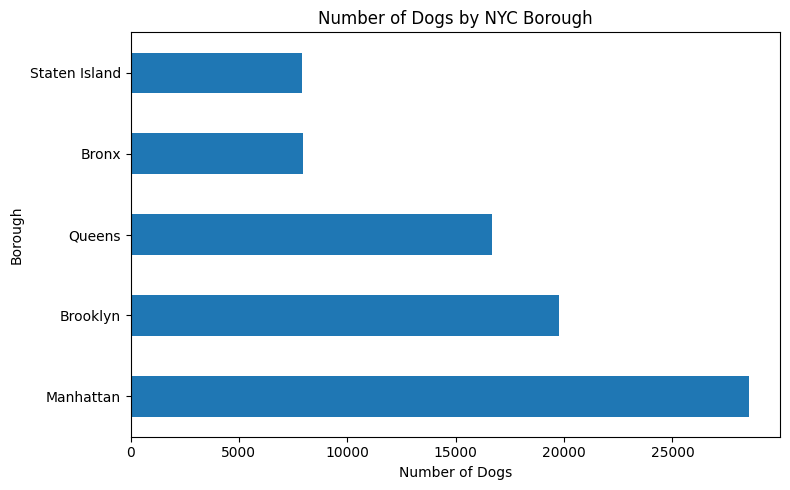

In [41]:
import matplotlib.pyplot as plt

# Count dogs by borough
borough_counts = dogs_with_neighborhoods['borough'].value_counts()

# Plot as a horizontal bar graph
borough_counts.plot(kind='barh', figsize=(8,5))
plt.xlabel('Number of Dogs')
plt.ylabel('Borough')
plt.title('Number of Dogs by NYC Borough')
plt.tight_layout()
plt.show()

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [43]:
# Read in the population data
pop = pd.read_csv('boro_population.csv')

# Count dogs in each borough
dogs_per_boro = dogs_with_neighborhoods['borough'].value_counts().reset_index()
dogs_per_boro.columns = ['borough', 'num_dogs']

# Merge with population
merged = dogs_per_boro.merge(pop, on='borough')

# Calculate dogs per capita
merged['dogs_per_capita'] = merged['num_dogs'] / merged['population']

# Show the boroughs sorted by dogs per capita
print(merged[['borough', 'dogs_per_capita']].sort_values('dogs_per_capita', ascending=False))

         borough  dogs_per_capita
0      Manhattan         0.017352
4  Staten Island         0.016626
1       Brooklyn         0.007504
2         Queens         0.007138
3          Bronx         0.005463


## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? This is very crazy, so ask in Slack, or a TA, or our buddy ChatGPT.

In [44]:
top_breeds = (
    dogs_with_neighborhoods.groupby('borough')['Primary Breed']
    .value_counts()
    .groupby(level=0)
    .head(5)          # Take top 5 per borough
    .reset_index(name='count')
)

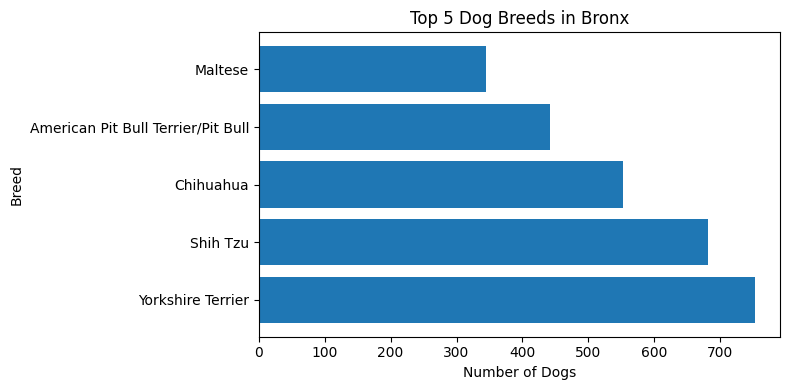

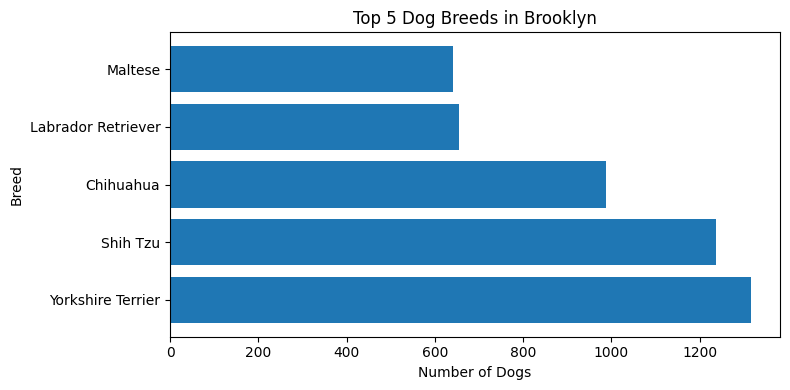

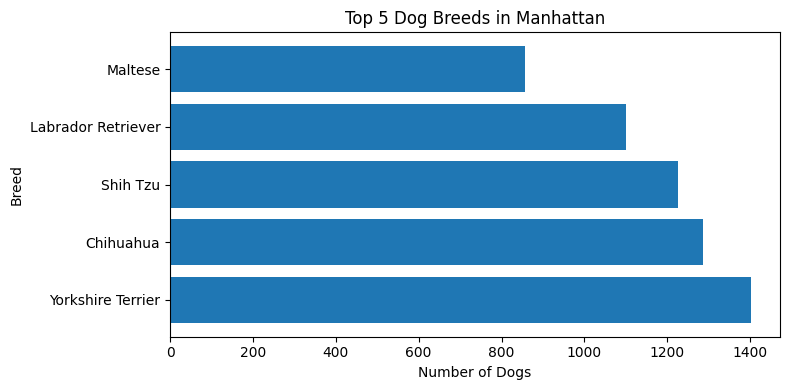

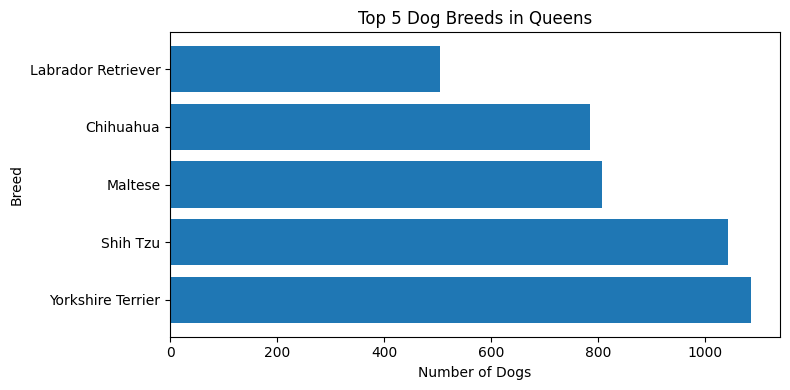

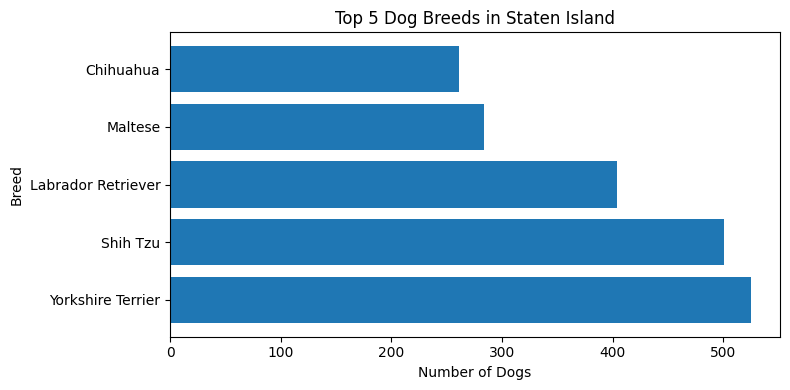

In [45]:
import matplotlib.pyplot as plt

for borough in top_breeds['borough'].unique():
    subset = top_breeds[top_breeds['borough'] == borough]
    plt.figure(figsize=(8,4))
    plt.barh(subset['Primary Breed'], subset['count'])
    plt.title(f'Top 5 Dog Breeds in {borough}')
    plt.xlabel('Number of Dogs')
    plt.ylabel('Breed')
    plt.tight_layout()
    plt.show()